In [1]:
# authenticate google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install necessary libraries
!pip install pyrsgis
!pip install rasterio
!pip install geopandas

In [3]:
# import all the required libraries
import os, glob, re
from pyrsgis import raster
from matplotlib import pyplot as plt
import matplotlib
import rasterio
import rasterio.plot
import geopandas as gpd

os.chdir(r'/content/drive/My Drive/KathmanduUrbanGrowth/urban_growth_GWLR/input_raster')

boundary_gpd = gpd.read_file(r'../shapefile/220209_KathmanduMunicipalBoundary_py_utm45n_PT_V1.shp')

In [4]:
# define a function for alphanumeric filename sorting
def sorted_nicely(l): 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [5]:
# get all the files in the directory and get sorted names
files_list = sorted_nicely(glob.glob('*.tif'))
files_list = ['2000_BD_K3.tif', '2000_BD_K5.tif', '2000_BD_K7.tif', '2000_BD_K9.tif', '2000_BD_K11.tif', '2000_BD_K13.tif',
              '2000_VD_K5.tif', '2000_AD_K5.tif', '2000_dist_builtup.tif', '2000_r1_dist.tif', '2000_r2_dist.tif', '2000_r3_dist.tif',
              '2010_BD_K3.tif', '2010_BD_K5.tif', '2010_BD_K7.tif', '2010_BD_K9.tif', '2010_BD_K11.tif', '2010_BD_K13.tif', 
              '2010_VD_K5.tif', '2020_AD_K5.tif','2010_dist_builtup.tif', '2010_r1_dist.tif', '2010_r2_dist.tif', '2010_r3_dist.tif',
              '2020_BD_K3.tif', '2020_BD_K5.tif', '2020_BD_K7.tif', '2020_BD_K9.tif', '2020_BD_K11.tif', '2020_BD_K13.tif',
              '2020_VD_K5.tif', '2010_AD_K5.tif', '2020_dist_builtup.tif', '2020_r1_dist.tif', '2020_r2_dist.tif', '2020_r3_dist.tif',
              'dist_bus_stops.tif', 'dist_hospitals.tif', 'dist_hotels.tif', 'dist_institutes.tif', 'dist_water.tif', 'elevation.tif', 'latitudes.tif', 'longitudes.tif', 'slope.tif']
print(files_list)

# change font size of the plot
font = {'family' : 'Open Sans',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)

['2000_BD_K3.tif', '2000_BD_K5.tif', '2000_BD_K7.tif', '2000_BD_K9.tif', '2000_BD_K11.tif', '2000_BD_K13.tif', '2000_VD_K5.tif', '2000_AD_K5.tif', '2000_dist_builtup.tif', '2000_r1_dist.tif', '2000_r2_dist.tif', '2000_r3_dist.tif', '2010_BD_K3.tif', '2010_BD_K5.tif', '2010_BD_K7.tif', '2010_BD_K9.tif', '2010_BD_K11.tif', '2010_BD_K13.tif', '2010_VD_K5.tif', '2020_AD_K5.tif', '2010_dist_builtup.tif', '2010_r1_dist.tif', '2010_r2_dist.tif', '2010_r3_dist.tif', '2020_BD_K3.tif', '2020_BD_K5.tif', '2020_BD_K7.tif', '2020_BD_K9.tif', '2020_BD_K11.tif', '2020_BD_K13.tif', '2020_VD_K5.tif', '2010_AD_K5.tif', '2020_dist_builtup.tif', '2020_r1_dist.tif', '2020_r2_dist.tif', '2020_r3_dist.tif', 'dist_bus_stops.tif', 'dist_hospitals.tif', 'dist_hotels.tif', 'dist_institutes.tif', 'dist_water.tif', 'elevation.tif', 'latitudes.tif', 'longitudes.tif', 'slope.tif']


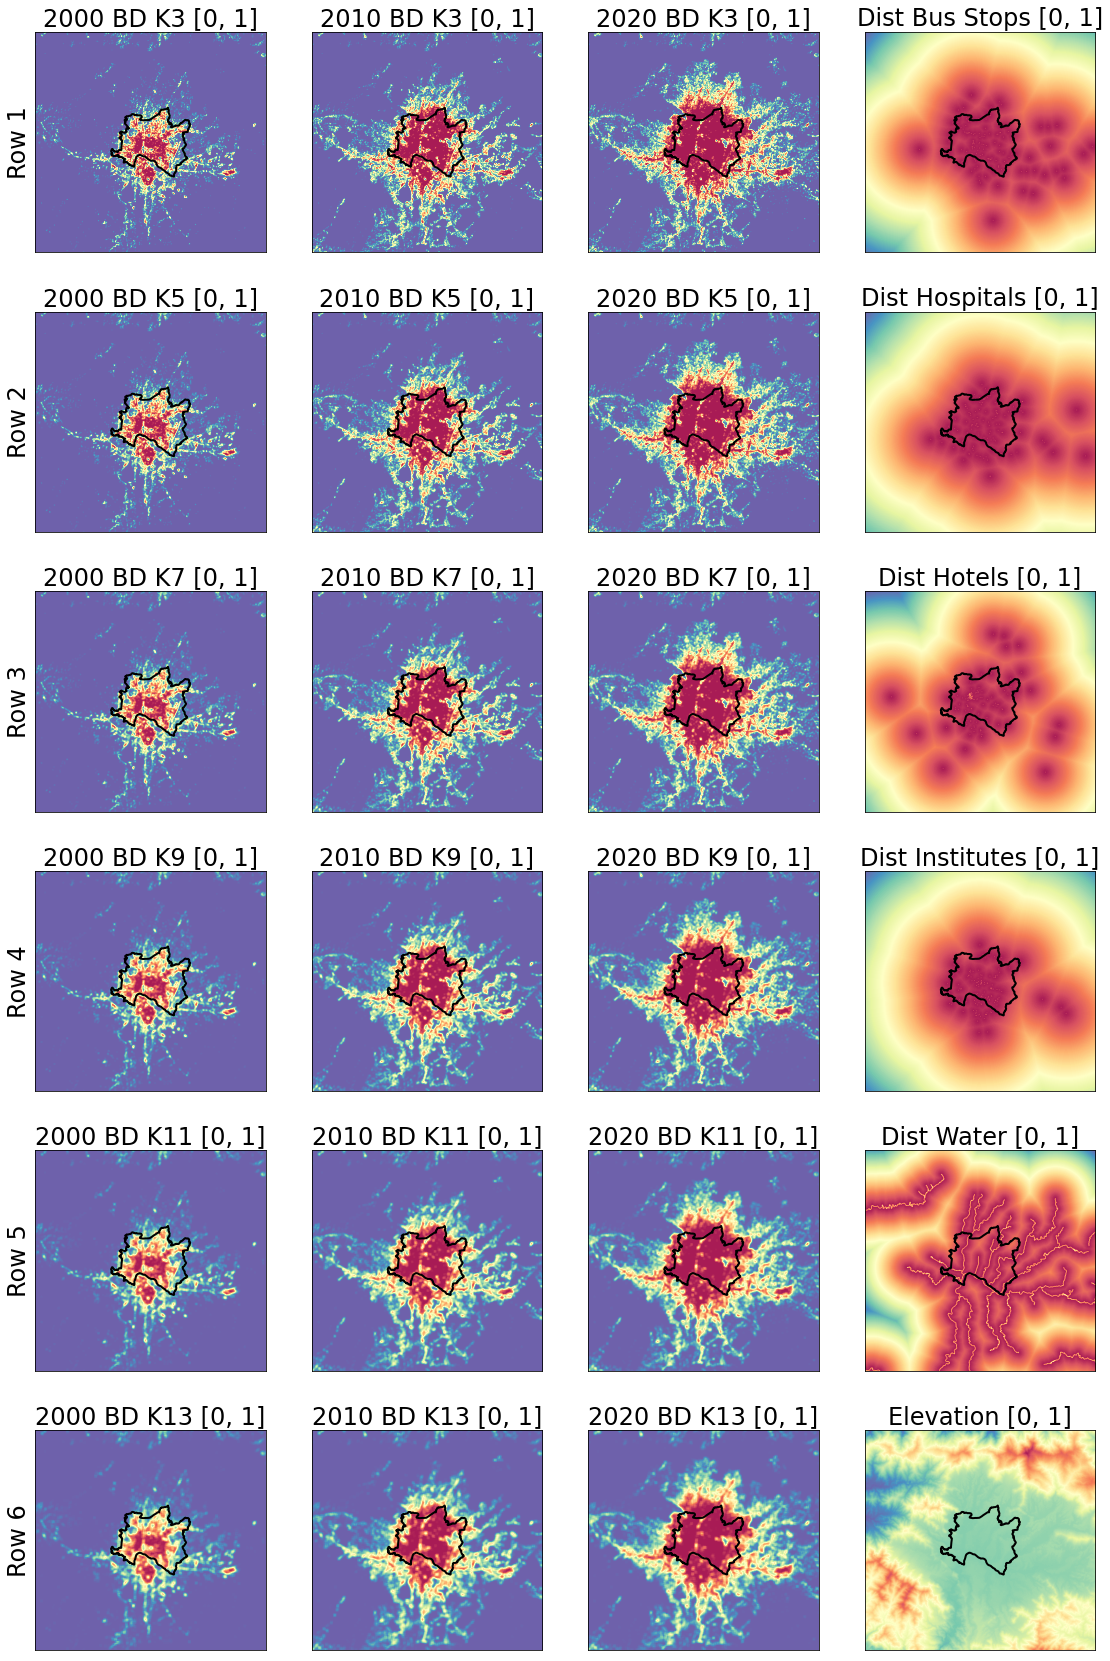

In [8]:
files_list1 = ['2000_BD_K3.tif', '2000_BD_K5.tif', '2000_BD_K7.tif', '2000_BD_K9.tif', '2000_BD_K11.tif', '2000_BD_K13.tif',
              '2010_BD_K3.tif', '2010_BD_K5.tif', '2010_BD_K7.tif', '2010_BD_K9.tif', '2010_BD_K11.tif', '2010_BD_K13.tif', 
              '2020_BD_K3.tif', '2020_BD_K5.tif', '2020_BD_K7.tif', '2020_BD_K9.tif', '2020_BD_K11.tif', '2020_BD_K13.tif',
              'dist_bus_stops.tif', 'dist_hospitals.tif', 'dist_hotels.tif', 'dist_institutes.tif', 'dist_water.tif', 'elevation.tif']

# plot all the rasters
plot_rows, plot_cols = 6, 4
fig, ax = plt.subplots(plot_rows, plot_cols)
fig.set_figheight(30)
fig.set_figwidth(19)

for n, file in enumerate(files_list1):
  # read the raster
  name, ext = os.path.splitext(file)

  """
  ds, arr = raster.read(file)
  arr = arr[1:-1, 1:-1]
  arr[arr < 0] = 0
  min_val = arr.min()
  max_val = arr.max()
  """

  # read using rasterio instead of pyrsgis to be able to plot shapefiel on top of it
  arr = rasterio.open(file)
  min_val = arr.read(1).min()
  max_val = arr.read(1).max()

  #print('%s read successfully!'%name, 'Shape:', arr.shape, 'Value range: %.2f to %.2f'%(min_val, max_val))

  y_index = n % plot_rows
  x_index = n // plot_rows

  #ax[y_index, x_index].imshow(arr, interpolation='nearest', cmap='Spectral_r')
  rasterio.plot.show(arr, ax=ax[y_index, x_index], cmap='Spectral_r', alpha=0.9)
  boundary_gpd.plot(ax=ax[y_index, x_index], facecolor='none', edgecolor='black', linewidth=2)

  if x_index == 3:
    ax[y_index, x_index].set_title('%s [%.0f, %.0f]' % (name.replace('_', ' ').title(), min_val, max_val))
  else:
    ax[y_index, x_index].set_title('%s [%.0f, %.0f]' % (name.replace('_', ' '), min_val, max_val))
  
  ax[y_index, x_index].axes.xaxis.set_visible(False)
  #ax[y_index, x_index].axes.yaxis.set_visible(False)
  ax[y_index, x_index].set_yticks([])

  if x_index == 0:
    ax[y_index, x_index].set_ylabel('Row %d' % (y_index+1), fontsize=24)

#fig.subplots_adjust(wspace=None, hspace=None)
plt.savefig('220212_InputRasters_Part1_PT_V6.png', dpi=300, format='PNG', bbox_inches='tight', pad_inches=0)
#plt.show()

In [10]:
files_list2 = ['2000_VD_K5.tif', '2000_AD_K5.tif', '2000_dist_builtup.tif', '2000_r1_dist.tif', '2000_r2_dist.tif', '2000_r3_dist.tif',
              '2010_VD_K5.tif', '2020_AD_K5.tif','2010_dist_builtup.tif', '2010_r1_dist.tif', '2010_r2_dist.tif', '2010_r3_dist.tif',
              '2020_VD_K5.tif', '2010_AD_K5.tif', '2020_dist_builtup.tif', '2020_r1_dist.tif', '2020_r2_dist.tif', '2020_r3_dist.tif',
              'slope.tif', 'latitudes.tif', 'longitudes.tif']

# plot all the rasters
plot_rows, plot_cols = 6, 4
fig, ax = plt.subplots(plot_rows, plot_cols)
fig.set_figheight(30)
fig.set_figwidth(19)

for n, file in enumerate(files_list2):
  # read the raster
  name, ext = os.path.splitext(file)

  """
  ds, arr = raster.read(file)
  arr = arr[1:-1, 1:-1]
  arr[arr < 0] = 0
  min_val = arr.min()
  max_val = arr.max()
  """

  # read using rasterio instead of pyrsgis to be able to plot shapefiel on top of it
  arr = rasterio.open(file)
  min_val = arr.read(1).min()
  max_val = arr.read(1).max()

  #print('%s read successfully!'%name, 'Shape:', arr.shape, 'Value range: %.2f to %.2f'%(min_val, max_val))

  y_index = n % plot_rows
  x_index = n // plot_rows

  #ax[y_index, x_index].imshow(arr, interpolation='nearest', cmap='Spectral_r')
  rasterio.plot.show(arr, ax=ax[y_index, x_index], cmap='Spectral_r', alpha=0.9)
  boundary_gpd.plot(ax=ax[y_index, x_index], facecolor='none', edgecolor='black', linewidth=2)

  if (
      'latitude' in name \
      or 'longitude' in name
  ):
    ax[y_index, x_index].set_title('%s' % (name.title()))
  else:
    if x_index == 3:
      ax[y_index, x_index].set_title('%s [%.0f, %.0f]' % (name.replace('_', ' ').title(), min_val, max_val))
    else:
      ax[y_index, x_index].set_title('%s [%.0f, %.0f]' % (name.replace('_', ' '), min_val, max_val))
  
  ax[y_index, x_index].axes.xaxis.set_visible(False)
  #ax[y_index, x_index].axes.yaxis.set_visible(False)
  ax[y_index, x_index].set_yticks([])

  if x_index == 0:
    ax[y_index, x_index].set_ylabel('Row %d' % (y_index+1), fontsize=24)

# remove empty axes
fig.delaxes(ax[3][3])
fig.delaxes(ax[4][3])
fig.delaxes(ax[5][3])

#fig.subplots_adjust(wspace=None, hspace=None)
plt.savefig('220212_InputRasters_Part2_PT_V6.png', dpi=300, format='PNG', bbox_inches='tight', pad_inches=0)
#plt.show()

Output hidden; open in https://colab.research.google.com to view.